In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os  # 引入os库用于处理文件路径

# ==========================================
# 1. 基础设置与读取数据
# ==========================================

# 设置图形风格
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial'] 
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# 原始数据路径
file_path = r"C:\Users\17616\Desktop\可视化大作业\Sleep_health_and_lifestyle_dataset.csv"

# [新增] 设置图片保存路径
# 在你的桌面文件夹里自动创建一个叫 "output_images" 的文件夹
output_dir = r"C:\Users\17616\Desktop\可视化大作业\output_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"新建文件夹: {output_dir}")
else:
    print(f"图片将保存至: {output_dir}")

# 读取数据
try:
    df = pd.read_csv(file_path)
    print(f"成功读取数据，共 {len(df)} 条。")
except Exception as e:
    print(f"读取出错：{e}")

# ==========================================
# 2. 数据清洗与特征工程
# ==========================================

df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

if df['Blood Pressure'].dtype == 'O':
    df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# 统一一下BMI的命名（防止 Normal 和 Normal Weight 分开）
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

df['Activity_Group'] = pd.cut(df['Physical Activity Level'], 
                              bins=[-1, 30, 60, 100], 
                              labels=['Low Activity', 'Medium Activity', 'High Activity'])

print("数据预处理完成，开始绘图并保存...")


图片将保存至: C:\Users\17616\Desktop\可视化大作业\output_images
成功读取数据，共 374 条。
数据预处理完成，开始绘图并保存...


已保存: Fig1_Distribution.png


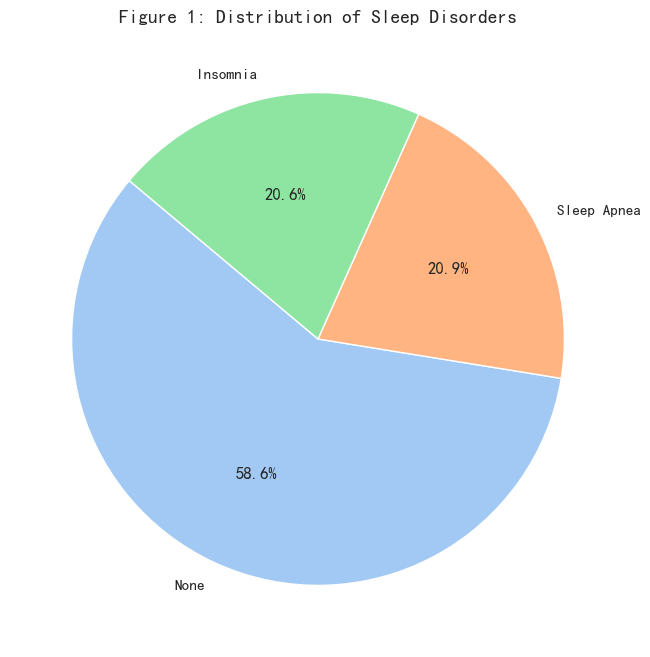

In [26]:
# ==========================================
# 3. 可视化叙事与图片保存
# ==========================================

# 辅助函数：保存图片
def save_chart(filename):
    save_path = os.path.join(output_dir, filename)
    # dpi=300 保证图片清晰度适合打印或插入文档
    # bbox_inches='tight' 保证保存时不会切掉图例或标签
    plt.savefig(save_path, dpi=300, bbox_inches='tight') 
    print(f"已保存: {filename}")

### 图表 1: 现状揭示:睡眠障碍的普遍性
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:5]
disorder_counts = df['Sleep Disorder'].value_counts()
plt.pie(disorder_counts, labels=disorder_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})
plt.title('Figure 1: Distribution of Sleep Disorders', fontweight='bold')
save_chart("Fig1_Distribution.png") # 保存
plt.show()


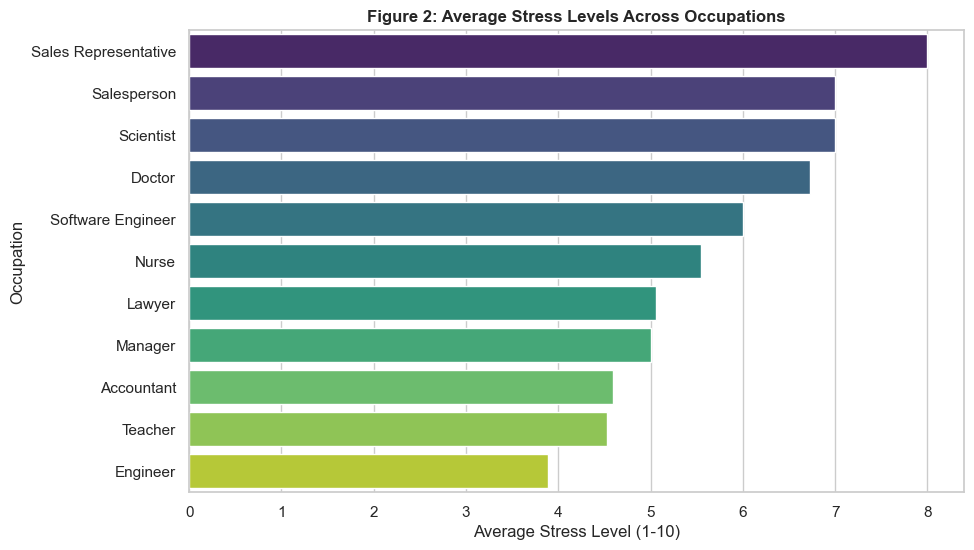

In [67]:
### 图表 2: 职业压力排行: 谁在承受结构性压力？
plt.figure(figsize=(10, 6))

# 计算排序顺序
order = df.groupby('Occupation')['Stress Level'].mean().sort_values(ascending=False).index

# 绘图 
sns.barplot(
    data=df, 
    x='Stress Level', 
    y='Occupation', 
    order=order,           # 控制条形的顺序
    hue='Occupation',      # 解决报错
    hue_order=order,       # 强制颜色顺序 = 条形顺序 -> 恢复渐变效果！
    palette='viridis',     # 深紫色到黄绿色的渐变
    errorbar=None,         # 去掉黑线
    legend=False           # 关掉图例
)

plt.title('Figure 2: Average Stress Levels Across Occupations', fontweight='bold')
plt.xlabel('Average Stress Level (1-10)')
plt.ylabel('Occupation')
# 保存或显示
plt.savefig(os.path.join(output_dir, "Fig2_Stress_Gradient.png"), dpi=300, bbox_inches='tight')
plt.show()

已保存: Fig3_Stress_Quality_Duration.png


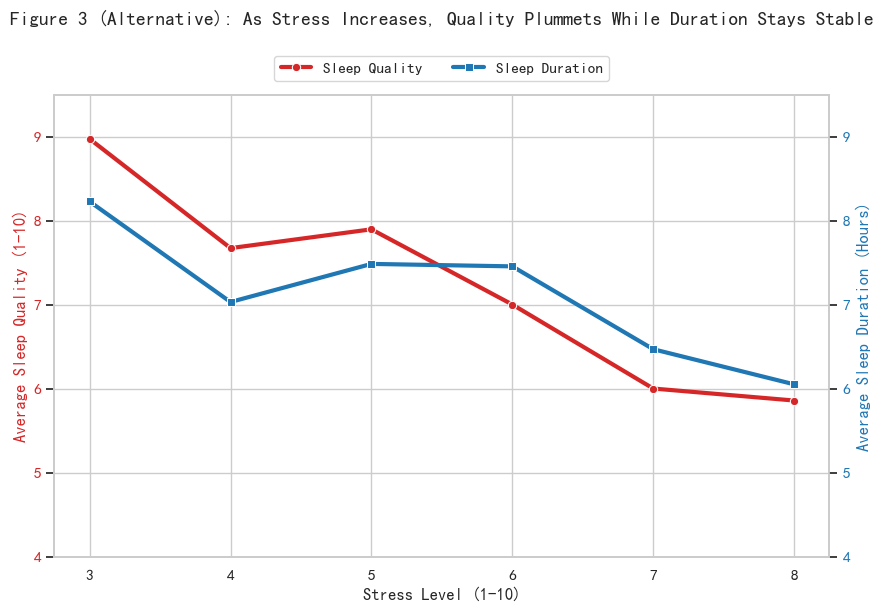

In [56]:
### 图表 3: 压力偷走了质量而非时长 (核心图表)
plt.figure(figsize=(10, 6))

# 1. 数据聚合
grouped = df.groupby('Stress Level')[['Quality of Sleep', 'Sleep Duration']].mean().reset_index()

# 2. 创建主坐标轴 (左轴) - 画睡眠质量
# [关键点] 加上 legend=False
ax1 = sns.lineplot(data=grouped, x='Stress Level', y='Quality of Sleep', 
                   color='#d62728', marker='o', linewidth=3, label='Sleep Quality', legend=False)
ax1.set_ylabel('Average Sleep Quality (1-10)', color='#d62728', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#d62728')
ax1.set_xlabel('Stress Level (1-10)', fontsize=12)

# 3. 创建副坐标轴 (右轴) - 画睡眠时长
ax2 = ax1.twinx()
# [关键点] 加上 legend=False
sns.lineplot(data=grouped, x='Stress Level', y='Sleep Duration', 
             color='#1f77b4', marker='s', linewidth=3, label='Sleep Duration', ax=ax2, legend=False)
ax2.set_ylabel('Average Sleep Duration (Hours)', color='#1f77b4', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#1f77b4')

# 设置Y轴范围
ax1.set_ylim(4, 9.5)  
ax2.set_ylim(4, 9.5) 

# 4. 手动合并图例并调整位置
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

 # bbox_to_anchor=(0.5, 1.1): 将图例放在图表区域的"上边缘"外部
 # ncol=2: 让两个图例横向并排显示
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, 
           loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, 
           frameon=True, fontsize=11)

plt.title('Figure 3 : As Stress Increases, Quality Plummets While Duration Stays Stable', 
          fontweight='bold', pad=50) # pad加大一点，给图例留出空间
plt.grid(False, axis='y')

save_chart("Fig3_Stress_Quality_Duration.png") # 保存
plt.show()


已保存: Fig4_Moderating_Effect.png


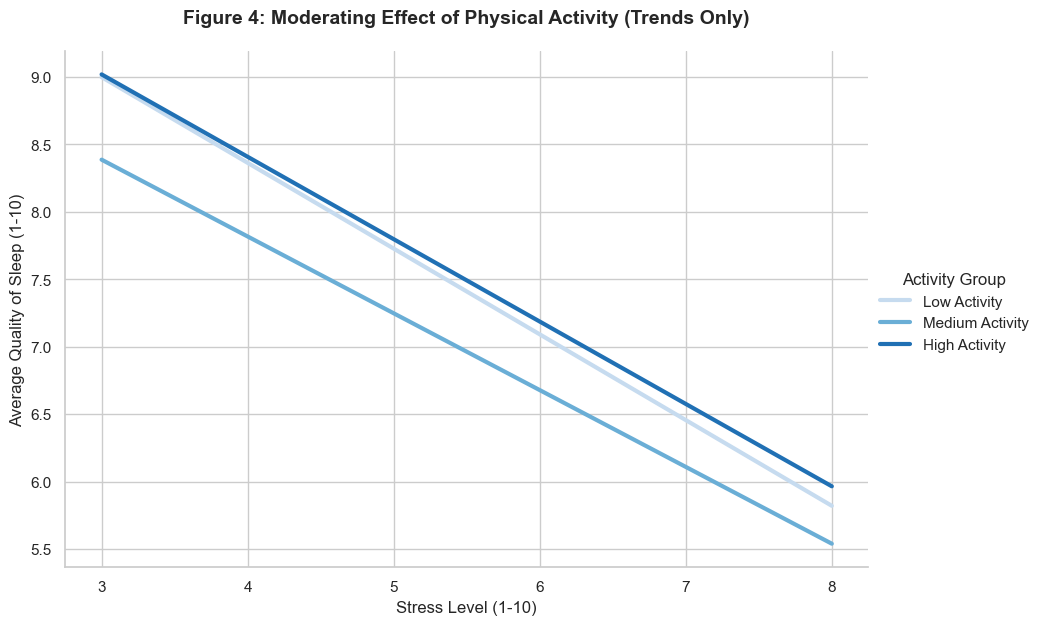

In [69]:
### 图表 4: 调节效应:运动如何改变游戏规则
activity_order = ['Low Activity', 'Medium Activity', 'High Activity']
g = sns.lmplot(
    data=df, 
    x='Stress Level', 
    y='Quality of Sleep', 
    hue='Activity_Group', 
    palette='Blues', 
    hue_order=activity_order,
    height=6, 
    aspect=1.5,
    
    ci=None,        # 不显示误差范围阴影
    scatter=False,  # 关闭散点，只画线！
    
    line_kws={'linewidth': 3} # 加粗线条，让它更显眼
)

# 设置标题和标签
plt.title('Figure 4: Moderating Effect of Physical Activity (Trends Only)', 
          fontweight='bold', fontsize=14, pad=20)
plt.xlabel('Stress Level (1-10)', fontsize=12)
plt.ylabel('Average Quality of Sleep (1-10)', fontsize=12)

# 优化图例标题
g._legend.set_title("Activity Group")


save_chart("Fig4_Moderating_Effect.png") # 保存
plt.show()

已保存: Fig5_Co_occurrence.png


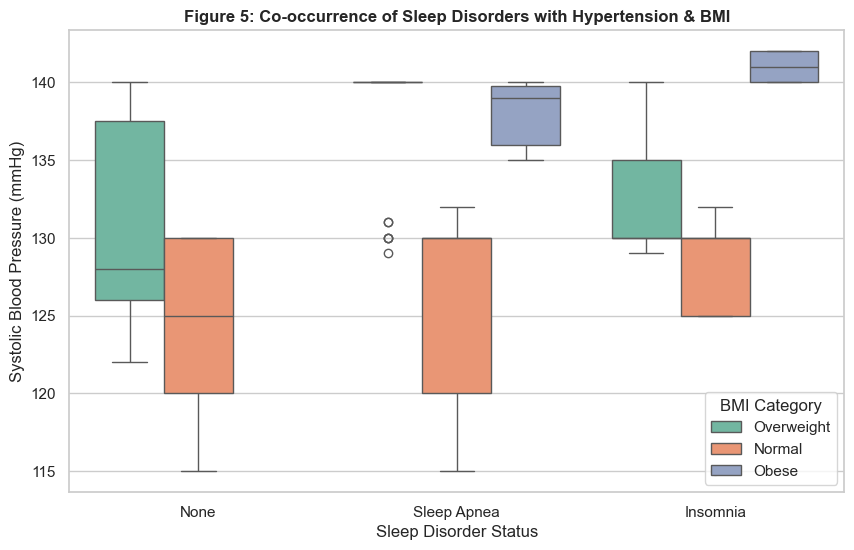

In [72]:
### 图表 5: 恶性循环:睡眠障碍与健康风险的共现
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x='Sleep Disorder', 
    y='Systolic_BP', 
    hue='BMI Category', 
    palette='Set2'
)
plt.title('Figure 5: Co-occurrence of Sleep Disorders with Hypertension & BMI', fontweight='bold')
plt.xlabel('Sleep Disorder Status')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.legend(title='BMI Category', loc='lower right')
save_chart("Fig5_Co_occurrence.png") # 保存
plt.show()

